**EC 414 - Spring 2019 - Prof. Kulis - HW 4 - Clustering (K-Means, DP-Means)**



Due Wed. March 27, 2019 - Before class starts.

**Problem 1:  K-Means**

Here you will apply K-Means on simple Gaussian data. You are given some code to guide you in implementing this clustering method.  Use of online code for K-Means is prohibited; use of the built-in scikitlearn function for K-Means is also prohibited. 
    

**(a)** Generate $3$ $2$D Gaussian clusters of data with the following means and covariances:

$\boldsymbol{\mu}_1 = [2,2]^T, \boldsymbol{\mu}_2 = [-2,2]^T, \boldsymbol{\mu}_3 = [0,-2]^T$,

$\Sigma_1 = [[0.02,0];[0,0.02]]$, $\Sigma_2 = [[0.2,0];[0,0.2]]$, $\Sigma_3 = [[0.05,0];[0,0.05]]$ 

Let each cluster of data have $50$ points. Plot the generated Gaussian data.

(50, 2)


(-4.5, 4.5)

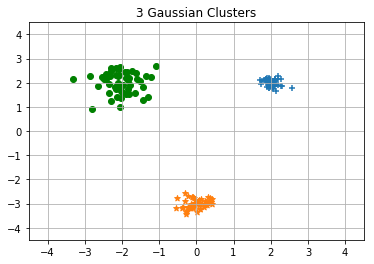

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from math import hypot
import random

# Generate 2D Gaussian Data with 3 clusters of 3 different means
# Write code here:
u1 = np.array([2,2]).T
u2 = np.array([-2,2]).T
u3 = np.array([0,-3]).T

cov1 = np.array([[0.02,0],[0,0.02]])
cov2 = np.array([[0.2,0],[0,0.2]])
cov3 = np.array([[0.05,0],[0,0.05]])

x1_samples = np.random.multivariate_normal(u1,cov1,50)
x2_samples = np.random.multivariate_normal(u2,cov2,50)
x3_samples = np.random.multivariate_normal(u3,cov3,50)

print(x1_samples.shape)

#Combined Data
DATA = np.concatenate((x1_samples, x2_samples,x3_samples), axis=0)


# Plotting

plt.grid()
plt.scatter(x1_samples[:,0],x1_samples[:,1], marker='+')
plt.scatter(x2_samples[:,0],x2_samples[:,1], c= 'green', marker='o')
plt.scatter(x3_samples[:,0],x3_samples[:,1], marker='*')

plt.title("3 Gaussian Clusters")
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)



# Write code here:



**(b)** Implement K-Means and apply it to the Gaussian data above. The code below contains comments of what needs to be coded up at a specific part of the code.  Please write your code below these comments where necessary. 

Plot the created clusters per iteration in different colors. For convergence of the algorithm (stopping criterion), check whether the derived cluster means become stationary (don't change over iterations).  

Iteration:  1
[87.2408234822557, 87.63455106860059] [-14.81351806688862, -142.83802164194603] [-88.46395514965761, 98.89311548628888]


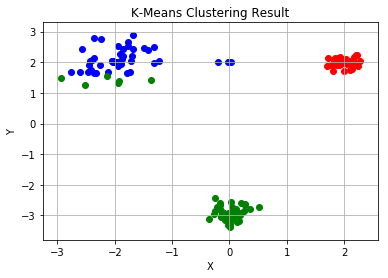

Iteration:  2
[87.08355804875748, 87.54800568887717] [-0.2260236149330444, -154.86632691129623] [-101.18287488699654, 107.43841071381136]


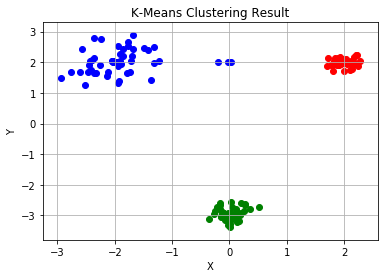

Iteration:  3
[87.0799838343598, 87.54603874842891] [0.02078836596367689, -155.36734966177377] [-101.20977392222618, 107.36144169846646]


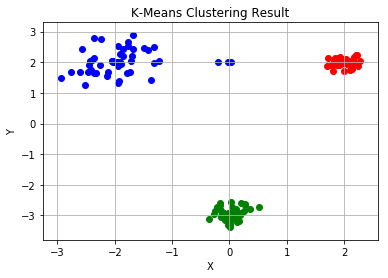

In [35]:
## K-Means implementation:

num_clusters = 3

### CODE 1 - Randomly initialize 3 means: ###
## Write code below here:
start = random.sample(range(0,150), num_clusters)

mean1 = DATA[start[0]]
mean2 = DATA[start[1]]
mean3 = DATA[start[2]]



# print(mean1)
# print(mean2)
# print(mean3)



##############################################

# initializations
labels = np.ones((DATA.shape[0],1))
converged = 0
iteration = 0
convergence_threshold = 2

while (converged==0):
    iteration += 1
    print('Iteration: ',iteration)
    
    ### CODE 2 - Assignment Step - Assign each data observation to the cluster with the nearest mean: ###
    ## Write code below here:
   
    for i in range(0,DATA.shape[0]):
        dist1 = np.zeros((3,1))
        mx1 = mean1[0]
        my1 = mean1[1]

        mx2 = mean2[0]
        my2 = mean2[1]

        mx3 = mean3[0]
        my3 = mean3[1]

        x = DATA[i,0]
        y = DATA[i,1]
        dist1[0] = hypot(x-mx1,y-my1)
        dist1[1] = hypot(x-mx2,y-my2)
        dist1[2] = hypot(x-mx3,y-my3)
        labels[i] = np.argmin(dist1)
        ###################################################################
        ### CODE 3 - Mean Updating - Update the cluster means ###
        ## Write code below here:
    counter0 = 0
    counter1 = 0
    counter2 = 0
    sum0=[0,0]
    sum1=[0,0]
    sum2=[0,0]

    for i in range(0,DATA.shape[0]):
        if(labels[i] == 0):
            counter0 += 1
            sum0[0] += DATA[i,0]
            sum0[1] += DATA[i,1]
        elif(labels[i] == 1):
            counter1 += 1
            sum1[0] += DATA[i,0]
            sum1[1] += DATA[i,1]
        else:
            counter2+=1
            sum2[0] += DATA[i,0]
            sum2[1] += DATA[i,1]
            
    print(sum0,sum1,sum2)
    mean1[0] = sum0[0]/counter0
    mean1[1] = sum0[1]/counter0
    
    mean2[0] = sum1[0]/counter1
    mean2[1] = sum1[1]/counter1
    mean3[0] = sum2[0]/counter2
    mean3[1] = sum2[1]/counter2

    
#    print(mean2)
#     print(mean3)
#     print(sum0)
#     print(counter0)
#     print(sum1)
#     print(counter1)
#     print(sum2)
#     print(counter2)

            ###########################################################

            ### CODE 4 - Check for convergence ###
            ## Write code below here:
    if(iteration ==1):
        conv_prev = 99999
        conv_curr = 0
    else:
        conv_prev = conv_curr 
        
    conv_sum = 0
    for i in range(0,DATA.shape[0]):
        if(labels[i] == 0):
            conv_sum += (DATA[i,0] - mean1[0])**2 + (DATA[i,1] - mean1[1])**2
        elif(labels[i] == 1):
            conv_sum += (DATA[i,0] - mean2[0])**2 + (DATA[i,1] - mean2[1])**2
        elif(labels[i] == 2):
            conv_sum += (DATA[i,0] - mean3[0])**2 + (DATA[i,1] - mean3[1])**2
    
    conv_curr = conv_sum
    
    
    if ((conv_prev - conv_curr) < convergence_threshold):
        converged=1

    #############################################################
    
    ### CODE 5 - Plot clustering results after each iteration: ###
    ## Write code below here:
    
    for i in range(0,DATA.shape[0]):
        if(labels[i] == 0):
            plt.scatter(DATA[i,0],DATA[i,1], color='red')
        elif(labels[i] == 1):
            plt.scatter(DATA[i,0],DATA[i,1], color = "green")
        elif(labels[i] == 2):
            plt.scatter(DATA[i,0],DATA[i,1], color = "blue")
    plt.grid()
    plt.title("K-Means Clustering Result")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    
        
    ###################################################################



**Problem 2: DP Means**

Here, you will implement DP-Means and test it out on National Basketball Association (NBA) data from the 2018-2019 season (currently ongoing season).



**(a)** Describe what the $\lambda$ parameter does in the DP-Means algorithm discussed in class. 

In [ ]:
Lambda is the penalty parameter in the DP-Means to used  form a new cluster. When the distances of a data point 
and the closest cluster is greater than lambda then, it creates new cluster. The larger the lambda value the
less likely to have the new clusters. If the smaller lambda value, the more likely to have the new clustrs

**(b)** Read in the NBA data from the ''NBA_stats_2018_2019.xlsx'' file and plot the Minutes Per Game (MPG) vs Points Per Game (PPG) statistics for all NBA players (a player is represented by a row of the data).  

In [3]:
%%bash
pip3 install xlrd

You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


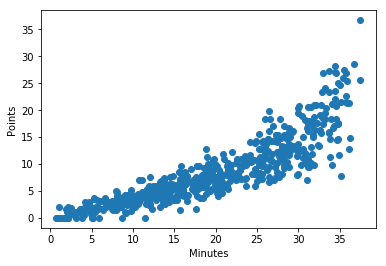

[[19.   5.3]
 [12.3  1.7]
 [ 8.6  2.8]
 ...
 [15.6  8.5]
 [19.2  8.4]
 [ 9.   1. ]]
5.3
[array([19.15415959,  8.39728353])]
[19.15415959  8.39728353]


In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import hypot
import random

df = pd.read_excel("NBA_stats_2018_2019.xlsx", sheetname='Sheet1')


################################
## Load data from spreadsheet ##
################################
MPG = df.pop("MPG")
PPG = df.pop("PPG")


# Write code here

############################
## Plot data - MPG vs PPG ##
############################
plt.scatter(MPG,PPG)
plt.xlabel("Minutes")
plt.ylabel("Points")

plt.show()


# Write code here
MPG = MPG.values
PPG = PPG.values

MPG = MPG.reshape(len(MPG),1)
PPG = PPG.reshape(len(PPG),1)


data_matrix = np.append(MPG,PPG,axis = 1)


MU = []
MU.append(np.mean(data_matrix,axis=0))

print(data_matrix)
print(data_matrix[0,1])
print(MU)
print(MU[0])


**(c)** Implement DP-Means and apply it to the $2$D (MPG, PPG) NBA data obtained above. The code below contains comments of what needs to be coded up at a specific part of the code.  Please write your code below these comments where necessary. Use of online code for DP-Means is prohibited; use of any Python built-in function for DP-Means is also prohibited. 

Plot the created clusters per iteration in different colors. For convergence of the algorithm (stopping criterion), check whether the derived cluster means become stationary (don't change over iterations) and the number of existing clusters also stays the same.  

Current iteration:  1


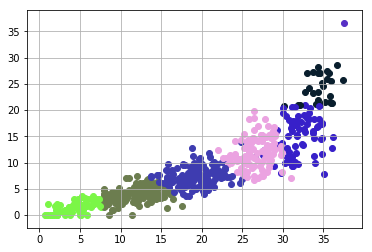

Current iteration:  2


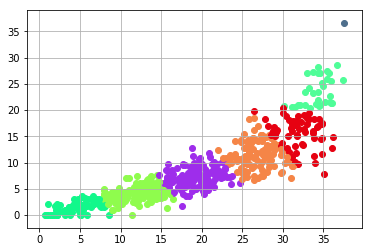

Current iteration:  3


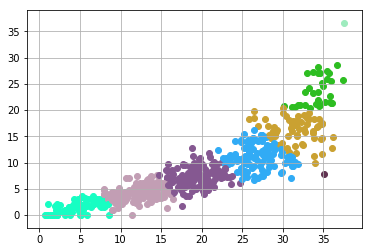

Current iteration:  4


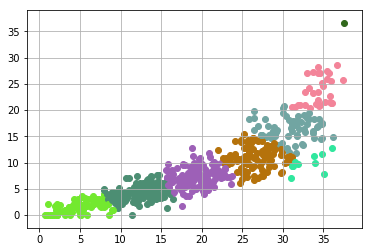

Current iteration:  5


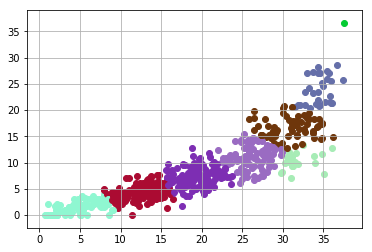

Current iteration:  6


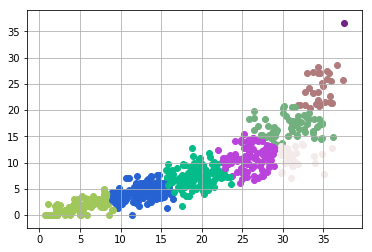

Current iteration:  7


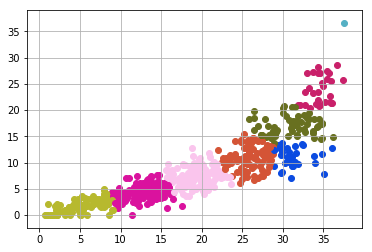

Current iteration:  8


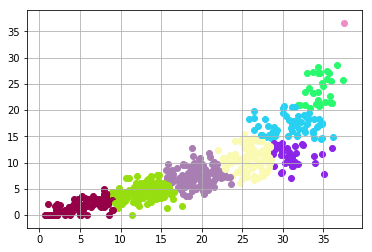

In [183]:
## DP-Means Implementation: ##

# Parameter Initializations
LAMBDA = 8
convergence_threshold = 1

### DP Means - Initializations for algorithm ###
# cluster count
K = 1
num_points = data_matrix.shape[0]
# sets of points that make up clusters
L = []
L.append(range(num_points))

# Class indicators/labels
Z = np.ones((1,num_points))

K_val = True

# means
MU = []
MU.append(np.mean(data_matrix,axis=0))

################################################

# Initializations for algorithm:
converged = 0
t = 0
while converged == 0:
    t += 1
    K_val = True
    print('Current iteration: ',t)

    ## Per Data Point: ##
    for i in np.arange(num_points):
#         K_val = True
    #     ### CODE 1 - Calculate distance from current point to all currently existing clusters ###
    #     ## Write code below here:
       
        dist = np.zeros((1,K))
        
        for j in np.arange(len(MU)):
            x = data_matrix[i,0]
            y = data_matrix[i,1]
            meanx = MU[j][0]
            meany = MU[j][1]
#             print(x)
#             print(meanx)
            distance = hypot(x-meanx,y-meany)
#             print(distance)
            dist[0,j] = distance
            min_dist = np.argmin(dist)

        #########################################################################################

        ### CODE 2 - Look at how the min distance of the cluster distance list compares to LAMBDA ###
        ## Write code below here:
#         print(dist)
        if (dist[0,min_dist]> LAMBDA):
            K = K+1
            MU.append([x,y])
            Z[0,i] = K
            K_val = False
            # make new cluster solely consisting of the new point
        else:
            Z[0,i] = min_dist+1
            # assign point to the closest cluster


    #     #############################################################################################

    # ### CODE 3 - Form new sets of points (clusters) ###
    # ## Write code below here: not used because labeling is done in Z

    
    # ##################################################################

    # ### CODE 4 - Recompute means per cluster ###
    # ## Write code below here:
  
    MU = []
    cluster_sum = np.zeros((K,2))
    cluster_sum.shape
    cluster_counts = np.zeros((K,2))
    for i in np.arange(num_points):
        cluster_sum[int(Z[0,i]-1),0] += data_matrix[i,0]
        cluster_sum[int(Z[0,i]-1),1] += data_matrix[i,1]
        cluster_counts[int(Z[0,i]-1),0] += 1
        cluster_counts[int(Z[0,i]-1),1] += 1

    if(t == 1):
        prev_cluster = np.zeros((K,2))
    else: 
        prev_cluster = new_means

    new_means = cluster_sum/cluster_counts




    for i in range (0,new_means.shape[0]):
        MU.append([new_means[i,0],new_means[i,1]])
                
    # ####################################################

    # ### CODE 5 - Plot clustered data per iteration ###
    # ## Write code below here:
    colorlist = []
    plt.figure()
    for i in range(0,K):
        color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
        colorlist.append(color)
    for i in range(0,num_points):
        plt.scatter(data_matrix[i, 0], data_matrix[i, 1], color = colorlist[int(Z[0,i]-1)])
    plt.grid(True)
    plt.show()

    # ##########################################################

    # ### CODE 6 - Test for convergence: number of clusters doesn't change and means stay the same ###
    # ## Write code below here:

    if (K_val == True):
        if(np.sum(abs(prev_cluster - new_means)) < convergence_threshold):
            converged = 1
    else:
        converged = 0
    ####################################################






**(d)** Run the DP-Means code created above for the following $\lambda$ values:

$\underline{\lambda} = [4,10,14,24]$.

 Plot the resulting clusters for each $\lambda$ value and discuss the results.   

LAMBDA: 4 


Current iteration:  1


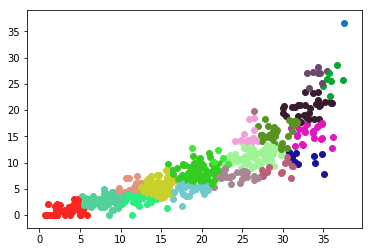

(20, 2)
(20, 2)
Current iteration:  2


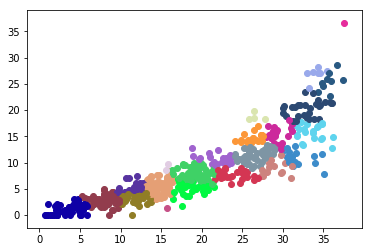

(20, 2)
(22, 2)
Current iteration:  3


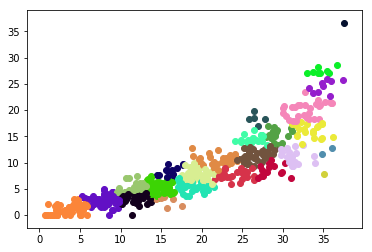

(22, 2)
(24, 2)
Current iteration:  4


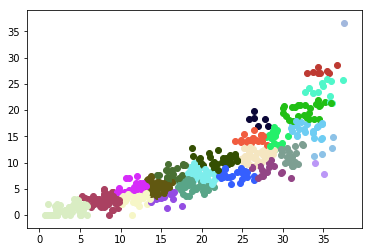

(24, 2)
(24, 2)
8.079401620565548
Current iteration:  5


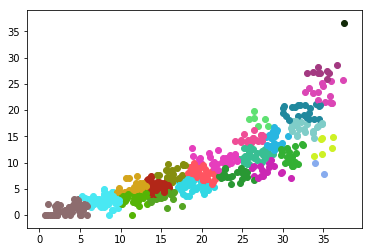

(24, 2)
(24, 2)
4.961729870285767
Current iteration:  6


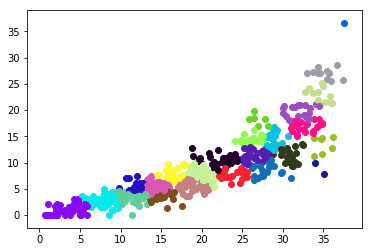

(24, 2)
(24, 2)
4.39153951607034
Current iteration:  7


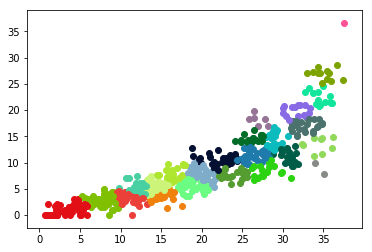

(24, 2)
(24, 2)
3.321624979042584
Current iteration:  8


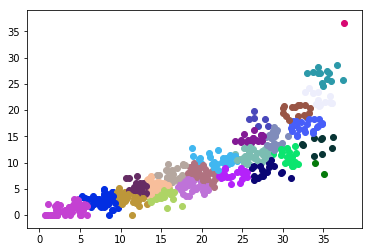

(24, 2)
(24, 2)
1.1494450372106848
Current iteration:  9


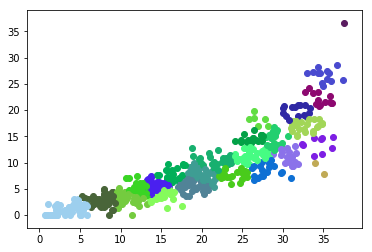

(24, 2)
(24, 2)
1.1799931565789623
Current iteration:  10


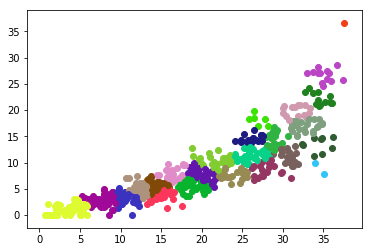

(24, 2)
(24, 2)
0.642047540588143
LAMBDA: 10 


Current iteration:  1


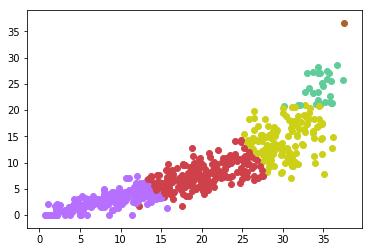

(5, 2)
(5, 2)
Current iteration:  2


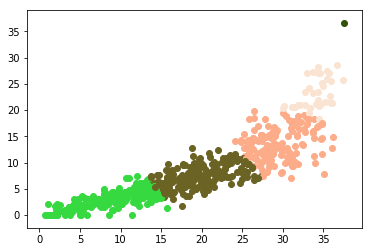

(5, 2)
(5, 2)
3.53455367049027
Current iteration:  3


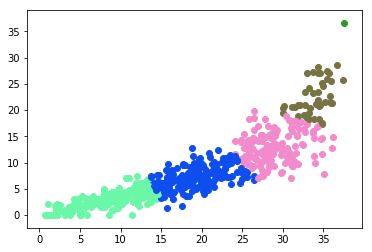

(5, 2)
(5, 2)
3.3040405568277045
Current iteration:  4


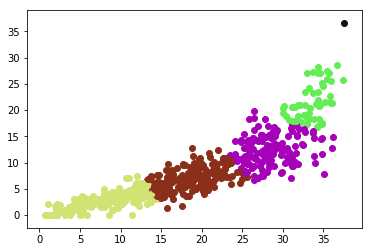

(5, 2)
(5, 2)
3.3048503294702147
Current iteration:  5


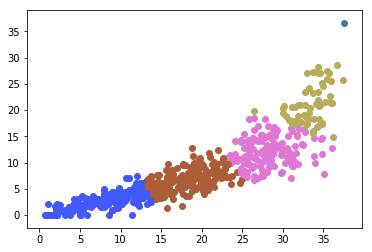

(5, 2)
(5, 2)
2.567399607637962
Current iteration:  6


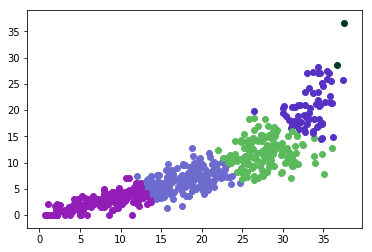

(5, 2)
(5, 2)
6.2565088009963485
Current iteration:  7


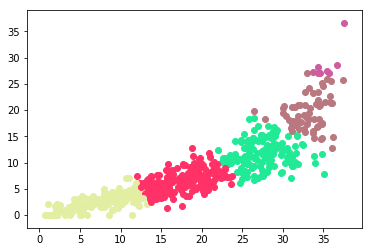

(5, 2)
(5, 2)
8.099203126034071
Current iteration:  8


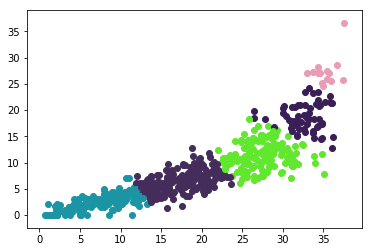

(5, 2)
(5, 2)
3.249136358271878
Current iteration:  9


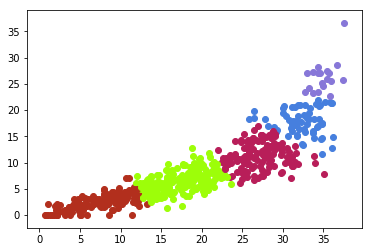

(5, 2)
(5, 2)
3.2720816290836523
Current iteration:  10


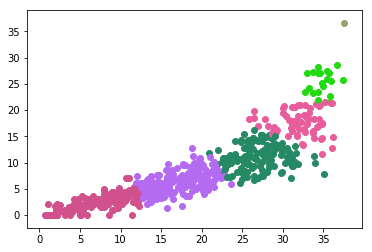

(5, 2)
(6, 2)
Current iteration:  11


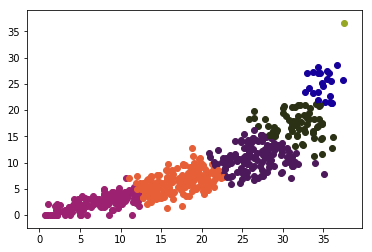

(6, 2)
(6, 2)
2.461686233559142
Current iteration:  12


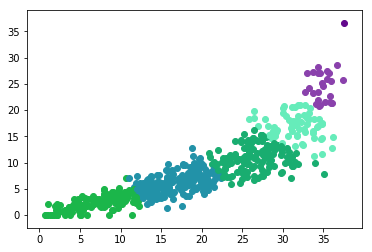

(6, 2)
(6, 2)
1.5441025795065317
Current iteration:  13


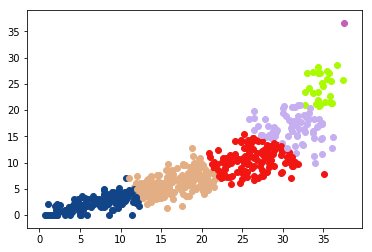

(6, 2)
(6, 2)
1.551462420380541
Current iteration:  14


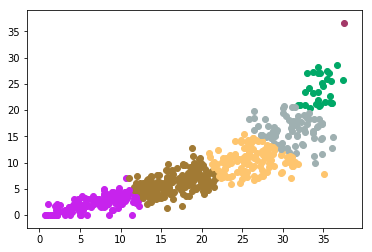

(6, 2)
(6, 2)
1.4962834049431897
Current iteration:  15


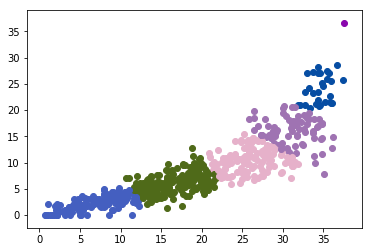

(6, 2)
(6, 2)
0.47289207788954757
LAMBDA: 14 


Current iteration:  1


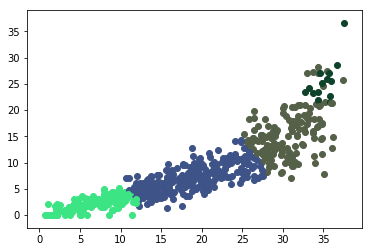

(4, 2)
(4, 2)
Current iteration:  2


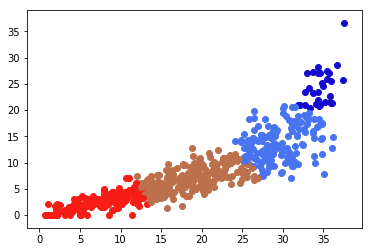

(4, 2)
(4, 2)
5.465813270606556
Current iteration:  3


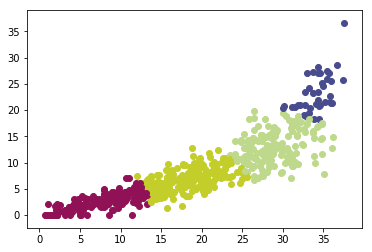

(4, 2)
(4, 2)
3.5769750112389653
Current iteration:  4


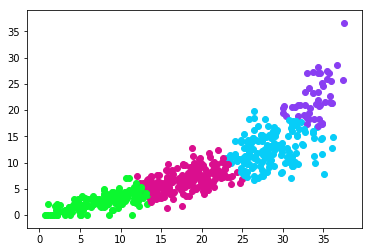

(4, 2)
(4, 2)
2.6658589962199324
Current iteration:  5


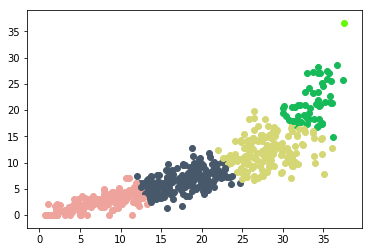

(4, 2)
(5, 2)
Current iteration:  6


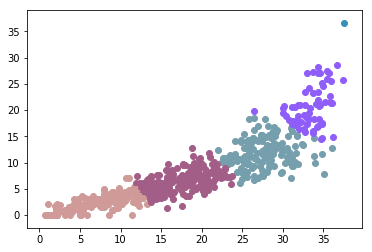

(5, 2)
(5, 2)
2.0079375335157845
Current iteration:  7


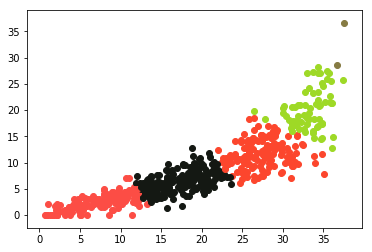

(5, 2)
(5, 2)
5.838220319294356
Current iteration:  8


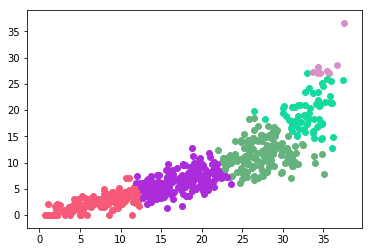

(5, 2)
(5, 2)
7.01092990161446
Current iteration:  9


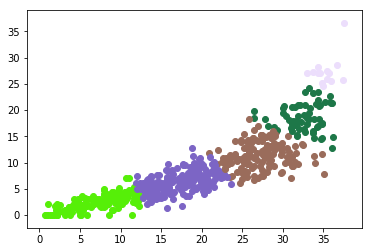

(5, 2)
(5, 2)
2.9984197379792157
Current iteration:  10


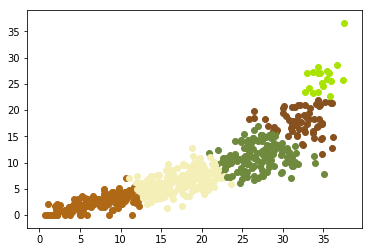

(5, 2)
(5, 2)
3.134592762752272
Current iteration:  11


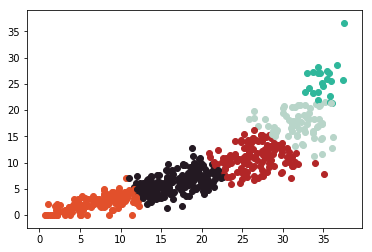

(5, 2)
(5, 2)
2.579405058938634
Current iteration:  12


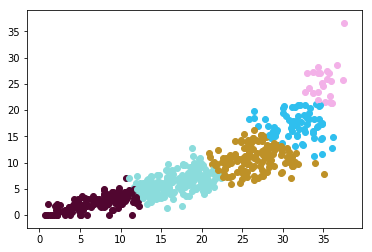

(5, 2)
(5, 2)
1.444511065917922
Current iteration:  13


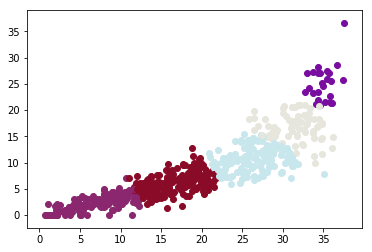

(5, 2)
(5, 2)
1.4863695949470266
Current iteration:  14


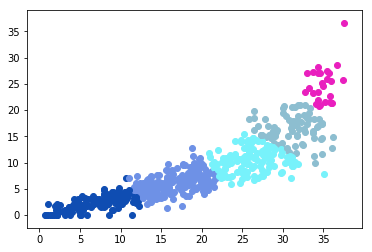

(5, 2)
(5, 2)
1.2178151279856828
Current iteration:  15


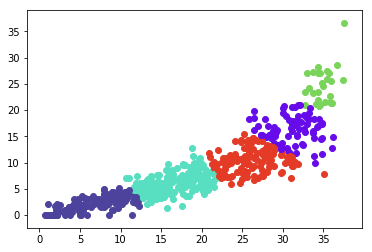

(5, 2)
(5, 2)
0.49241377003171616
LAMBDA: 24 


Current iteration:  1


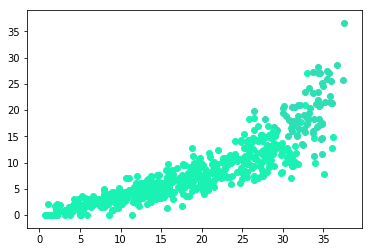

(2, 2)
(2, 2)
Current iteration:  2


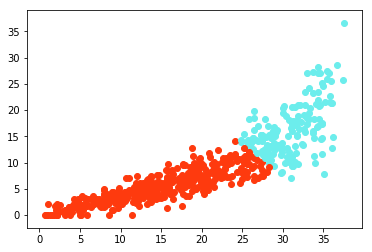

(2, 2)
(2, 2)
10.000297407642623
Current iteration:  3


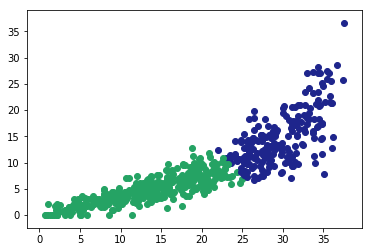

(2, 2)
(2, 2)
4.694226104636572
Current iteration:  4


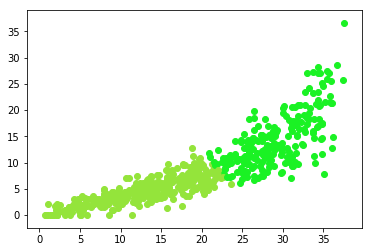

(2, 2)
(2, 2)
2.0429649081208563
Current iteration:  5


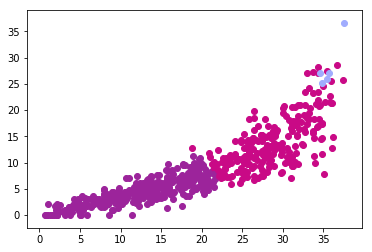

(2, 2)
(3, 2)
Current iteration:  6


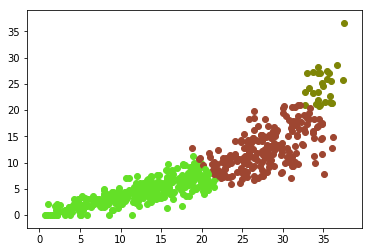

(3, 2)
(3, 2)
6.587511148577035
Current iteration:  7


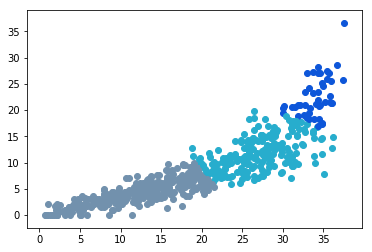

(3, 2)
(3, 2)
4.991599438166246
Current iteration:  8


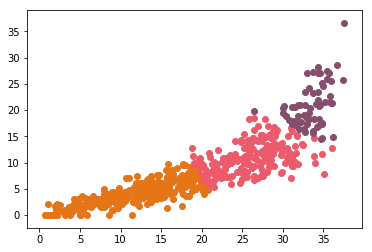

(3, 2)
(3, 2)
4.846640878492047
Current iteration:  9


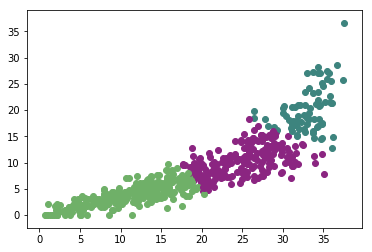

(3, 2)
(3, 2)
3.262656295592753
Current iteration:  10


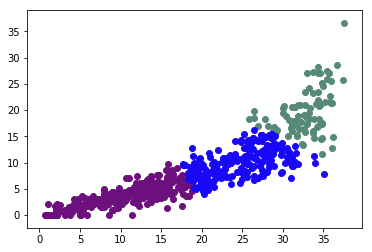

(3, 2)
(3, 2)
2.227185080112806
Current iteration:  11


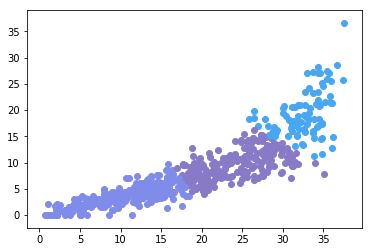

(3, 2)
(3, 2)
1.8106547096644037
Current iteration:  12


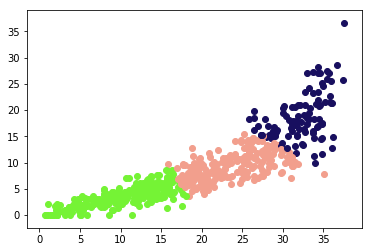

(3, 2)
(3, 2)
2.032056568297669
Current iteration:  13


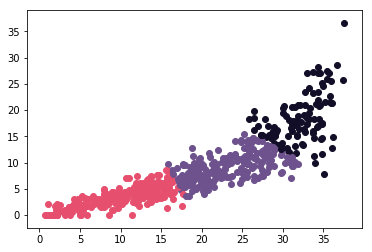

(3, 2)
(3, 2)
1.388077756327752
Current iteration:  14


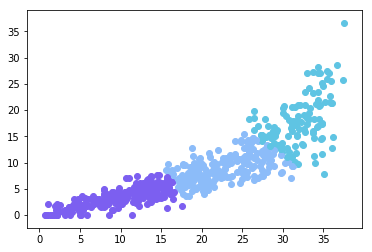

(3, 2)
(3, 2)
1.7050201170558363
Current iteration:  15


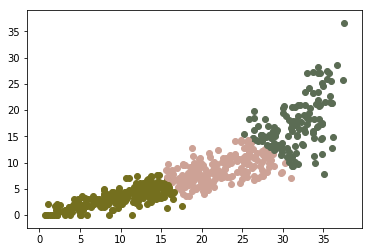

(3, 2)
(3, 2)
1.7113641190173974
Current iteration:  16


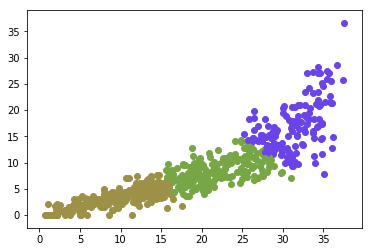

(3, 2)
(3, 2)
1.4043662454521324
Current iteration:  17


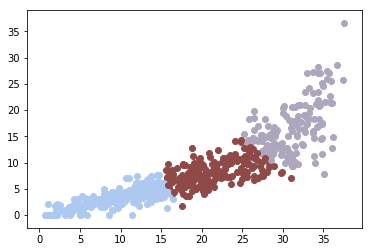

(3, 2)
(3, 2)
1.1013397828268636
Current iteration:  18


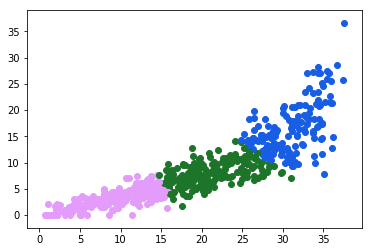

(3, 2)
(3, 2)
0.7282639747711035


In [178]:
# Plotting of results for different lambdas:

def dpmeans(L):
    convergence_threshold = 1
    num_points = len(MPG)
    LAMBDA = L
    ### DP Means - Initializations for algorithm ###
    # cluster count
    K = 1

    # sets of points that make up clusters
    L = []
    L.append(range(num_points))

    # Class indicators/labels
    Z = np.ones((1,num_points))

    # means
    MU = []
    MU.append(np.mean(data_matrix,axis=0))

    boolK = True
    ################################################

    # Initializations for algorithm:
    converged = 0
    t = 0
    while converged == 0:
        t += 1
        boolK = True
        print('Current iteration: ',t)

            ## Per Data Point: ##

        for i in np.arange(num_points):

            ### CODE 1 - Calculate distance from current point to all currently existing clusters ###
            ## Write code below here:
            dist = np.zeros((1,len(MU)))
            for j in np.arange(len(MU)):
                x = data_matrix[i,0]
                y = data_matrix[i,1]
                mx = MU[j][0]
                my = MU[j][1]
                dist[0,j] = hypot(x-mx, y-my)

                #########################################################################################

                ### CODE 2 - Look at how the min distance of the cluster distance list compares to LAMBDA ###
                ## Write code below here:
            cluster_dist = np.argmin(dist,axis=1)

            if (dist[0,cluster_dist]> LAMBDA):
                K = K+1
                Z[0,i] = K - 1
                MU.append([data_matrix[i,0],data_matrix[i,1]])
                boolK = False

                # make new cluster solely consisting of the new point
            else:
                #assign point to the closest cluster
                Z[0,i]= int(cluster_dist) 
                #boolK = True

                #############################################################################################
            ### CODE 3 - Form new sets of points (clusters) ###
            ## not used since Z is used as cluster index
            ## Write code below here:
    #     for i in range(0,num_points):
    #         dist = np.zeros((1,len(MU)))
    #         for j in np.arange(len(MU)):
    #             x = data_matrix[i,0]
    #             y = data_matrix[i,1]
    #             mx = MU[j][0]
    #             my = MU[j][1]
    #             dist[0,j] = hypot(x-mx, y-my)
    #         cluster_dist = np.argmin(dist,axis=1)+1
    #         Z[0,i] = int(cluster_dist)

            ##################################################################

            ### CODE 4 - Recompute means per cluster ###
            ## Write code below here:
        cluster_sum = np.zeros((K,2))
        cluster_counter = np.zeros((K,2))

        cluster_sum[1,0] = 3
        for i in range(0,num_points):
            cluster_sum[int(Z[0,i]),0] += data_matrix[i,0]
            cluster_sum[int(Z[0,i]),1] += data_matrix[i,1]
            cluster_counter[int(Z[0,i])] += 1

        if(t == 1):
            prev = np.zeros((K,2))
        else:
            prev = new_means

        new_means = cluster_sum/cluster_counter

        MU = []
        for i in range(0,K):
            MU.append(new_means[i,:])

            ####################################################

            ### CODE 5 - Plot clustered data per iteration ###
            ## Write code below here:

        plt.figure()
        colorlist = []
        for k in range(0,K):
            color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
            colorlist.append(color)
        for i in range(0,num_points):
            plt.scatter(data_matrix[i, 0], data_matrix[i, 1], color = colorlist[int(Z[0,i])])
        plt.show()

            ##########################################################

            ### CODE 6 - Test for convergence: number of clusters doesn't change and means stay the same ###
            ## Write code below here:
        print(prev.shape)
        print(new_means.shape)

        if(boolK == True):
            diff = np.sum(abs(prev - new_means))
            print(diff)

        if (boolK == True and diff<convergence_threshold):
            converged = 1
        else:
            converged = 0
            ####################################################






print('LAMBDA: 4','\n\n')
##############
# Lambda - 4##
##############

dpmeans(4)

# Write code here


print('LAMBDA: 10','\n\n')
##############
# Lambda - 10#
##############
dpmeans(10)
# Write code here

print('LAMBDA: 14','\n\n')
##############
# Lambda - 14#
##############
dpmeans(14)

# Write code here

print('LAMBDA: 24','\n\n')
##############
# Lambda - 24#
##############
dpmeans(24)

# Write code here

## discussion of results?

In [ ]:
When Lambda = 4 the iteration number is 12 and 24  clusters; 
When Lambda = 10 the iteration number is 14 and 6 clusters;
When Lambda = 14 iteration number is 15 and the 5 clusters;
When Lambda = 24 iteration number is 18 and the 3 clusters;

As lambda increases, there is less clusters, but does not assure there will be less iterations.
Also each cluster's data size inreases. 
Since Lambda is the penalty parameter that does not want to have more cluster as lambda
value increases, this approves that lambda is the minimum distance between mean of cluster and point data point
that is not in the cluster.

